In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm 

from traffic.core import Traffic

/tmp/ipykernel_25751/251887701.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
generated1 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC_0.parquet")
generated2 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC_1.parquet")
generated3 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC_2.parquet")
generated4 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC_3.parquet")
generated5 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC_4.parquet")

In [3]:
generated1[0] | generated2[0] | generated3[0] | generated4[0] | generated5[0]

In [6]:
count = 1263
N = 1e6
p = count/N
c = np.sqrt((1-p)/(N*p)) 
print(p, c)

0.001263 0.028120555424303733


In [3]:
p = 1e-4
er = 0.1
N = (1-p)/(p*er**2)
N

999899.9999999999

# Analysis los for West

In [4]:
import pandas as pd
los = pd.read_parquet("../los_generation/generation_west_config/los_5s_west.parquet")
generated1 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC2.parquet")
generated2 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC3.parquet")
generated3 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC4.parquet")
generated4 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC5.parquet")
generated5 = Traffic.from_file("../los_generation/generation_west_config/traffic_MC6.parquet")

In [95]:
t1 = Traffic.from_file("../deep_traffic_generation/data/training_datasets/landings_LFPO_25.pkl")
t2 = Traffic.from_file("../deep_traffic_generation/data/training_datasets/takeoffs_LFPO_24.pkl")

In [96]:
ref_date = pd.Timestamp("1900-01-01T00", tz = 'UTC')
def same_stop(f, t_ref):
    f.data.timestamp = f.data.timestamp + pd.to_timedelta(t_ref - f.stop, unit ="s")
    return f

t1 = t1.iterate_lazy().pipe(same_stop, ref_date).eval(desc = "stop time normalization")

import scipy.stats as st
dist = st.fatiguelife(c = 1.1635939736232785, loc = 52.634030248193504, scale = 251.13235704363382)

gen_dt = np.concatenate(([0],dist.rvs(len(t1)-1)))
cum_gen_dt = np.round(np.cumsum(gen_dt))
cum_gen_dt_aug = []
for td in cum_gen_dt:
    cum_gen_dt_aug.extend([td]*200) #Each generated trajectory has exactly 200 points

t1.data.timestamp = t1.data.timestamp + pd.to_timedelta(cum_gen_dt_aug, unit = "s")

Output()

/cluster/home/kruu/miniconda3/envs/tcas/lib/python3.9/site-packages/traffic/core/lazy.py:201: TqdmExperimentalWarning: rich is experimental/alpha
  iterator = tqdm(iterator, **tqdm_kw)


In [98]:
t2.data = t2.data.assign(timestamp=pd.to_timedelta(t2.data.timedelta, unit="s") + ref_date)

import scipy.stats as st
dist = st.fatiguelife(c = 1.1635939736232785, loc = 52.634030248193504, scale = 251.13235704363382)

gen_dt = np.concatenate(([0],dist.rvs(len(t2)-1)))
cum_gen_dt = np.round(np.cumsum(gen_dt))
cum_gen_dt_aug = []
for td in cum_gen_dt:
    cum_gen_dt_aug.extend([td]*200) #Each generated trajectory has exactly 200 points

t2.data.timestamp = t2.data.timestamp + pd.to_timedelta(cum_gen_dt_aug, unit = "s")

In [101]:
t = t1+t2

In [102]:
t.to_pickle("test_MC.pkl")

In [3]:
los

,horiz_spacing,vert_spacing,flight_id_1,flight_id_2,pair
timestamp,,,,,
1900-01-01 00:27:50+00:00,6536.015803,938.497726,LDNG_TRAJ_5_MC_2,TO_TRAJ_3_MC_2,"[LDNG_TRAJ_5_MC_2, TO_TRAJ_3_MC_2]"
1900-01-01 00:27:55+00:00,5760.400776,791.972384,LDNG_TRAJ_5_MC_2,TO_TRAJ_3_MC_2,"[LDNG_TRAJ_5_MC_2, TO_TRAJ_3_MC_2]"
1900-01-01 00:28:00+00:00,5132.848713,621.317029,LDNG_TRAJ_5_MC_2,TO_TRAJ_3_MC_2,"[LDNG_TRAJ_5_MC_2, TO_TRAJ_3_MC_2]"
1900-01-01 00:28:05+00:00,4869.512114,449.058087,LDNG_TRAJ_5_MC_2,TO_TRAJ_3_MC_2,"[LDNG_TRAJ_5_MC_2, TO_TRAJ_3_MC_2]"
1900-01-01 00:28:10+00:00,4171.673990,278.288868,LDNG_TRAJ_5_MC_2,TO_TRAJ_3_MC_2,"[LDNG_TRAJ_5_MC_2, TO_TRAJ_3_MC_2]"
...,...,...,...,...,...
2102-12-31 15:51:45+00:00,6589.662245,261.755369,LDNG_TRAJ_199987_MC_6,TO_TRAJ_199689_MC_6,"[LDNG_TRAJ_199987_MC_6, TO_TRAJ_199689_MC_6]"
2102-12-31 15:51:50+00:00,7144.024746,108.353279,LDNG_TRAJ_199987_MC_6,TO_TRAJ_199689_MC_6,"[LDNG_TRAJ_199987_MC_6, TO_TRAJ_199689_MC_6]"
2102-12-31 15:51:55+00:00,7781.081433,24.426136,LDNG_TRAJ_199987_MC_6,TO_TRAJ_199689_MC_6,"[LDNG_TRAJ_199987_MC_6, TO_TRAJ_199689_MC_6]"


In [10]:
generated1["LDNG_TRAJ_5_MC_2"] | generated1["TO_TRAJ_3_MC_2"]

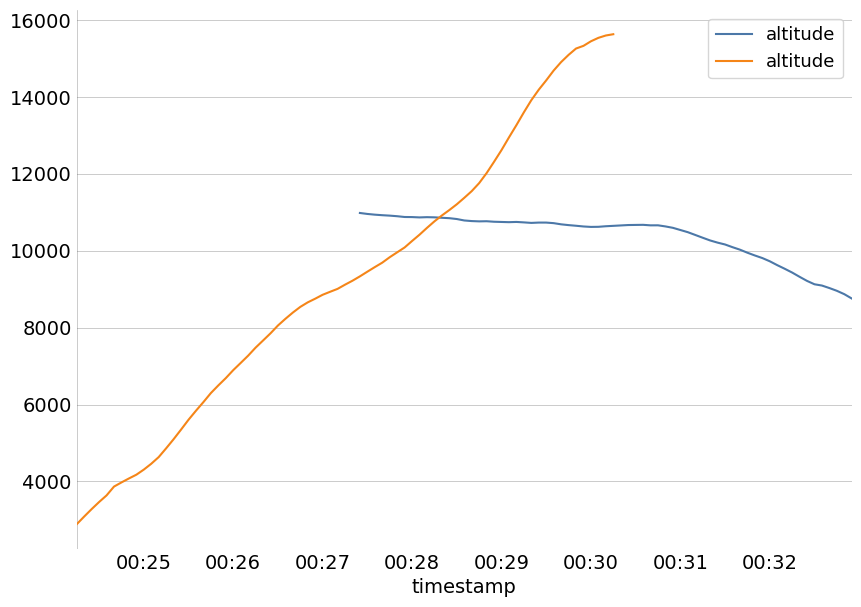

In [16]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

with plt.style.context("traffic"):

    fig, ax = plt.subplots(figsize=(10, 7))

    (
        generated1["LDNG_TRAJ_5_MC_2"]
        .plot_time(
            ax=ax,
            y=["altitude"],
        )
    )
    
    (
        generated1["TO_TRAJ_3_MC_2"]
        .plot_time(
            ax=ax,
            y=["altitude"],
        )
    )


plt.show()

In [9]:
test = generated1["LDNG_TRAJ_5_MC_2"] + generated1["TO_TRAJ_3_MC_2"]
test.map_leaflet()

Map(center=[48.545349898662465, 2.274213470779995], controls=(ZoomControl(options=['position', 'zoom_in_text',…

# Time differences between pairs takeoffs/landings

In [ ]:
starts_gen_to = gen_to.data.groupby("flight_id")["timestamp"].first().sort_values()
starts_gen_ldng = gen_ldng.data.groupby("flight_id")["timestamp"].first().sort_values()
ends_gen_ldng = gen_ldng.data.groupby("flight_id")["timestamp"].last().sort_values()
ends_gen_to = gen_to.data.groupby("flight_id")["timestamp"].last().sort_values()

In [33]:
import pandas as pd

delta_t = []

# first landings
for iL, tL in tqdm(starts_gen_ldng[:5000].items()):
    for iT, tT in starts_gen_to[:5000].items():
        d = tL - tT

        #If delta_t is posiive, takeoff starts AFTER landing, and then delta_t cannot be larger than landing duration
        #If delta_t is negative, takeoff starts BEFORE landing, and then delta_t cannot be larger than takeoff duration (absolute value)
        if d < tT - ends_gen_to[iT] or (d > ends_gen_ldng[iL] - tL):
            pass

        #make sure that delta_t is smaller than the total duration of the reference (the takeoff)
        elif d < ends_gen_ldng[iL] - tL: 
            delta_t.append({"takeoff": iT, "landing":iL, "delta_t":d.total_seconds()})

delta_t = pd.DataFrame(delta_t)

0it [00:00, ?it/s]

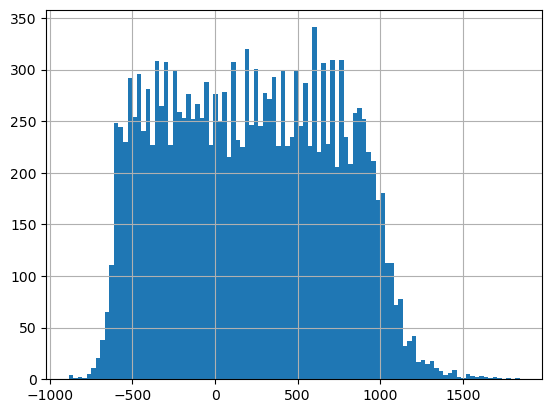

In [34]:
delta_t.delta_t.hist(bins = 100)
plt.show()

Delta_t between pairs is pretty similar when parametrizing flows or directly estimating the delta_t between pairs

# Horizontal intersection

In [4]:
n = 5000
small_to = gen_to[:n]
small_landing = gen_ldng[:n]

In [5]:
import pandas as pd
from shapely.geometry import LineString, Point
from tqdm.autonotebook import tqdm 

intersect = []

for f1, f2 in tqdm(zip(small_to, small_landing)):
    inter = f1.shape.intersection(f2.shape)
    if isinstance(inter, Point):
        intersect.append({"lat": inter.y, "lon":inter.x})


0it [00:00, ?it/s]

In [12]:
from traffic.data import airports
from ipyleaflet import Map, basemaps, Marker, MarkerCluster, Polygon
from ipywidgets import Layout



map_ = Map(
    center=airports["LFPO"].latlon,
    zoom=10,
    basemap=basemaps.Stamen.Terrain,
    layout=Layout(width="100%", height="1000px"),
)

# for i in range(10):
#     map_.add_layer(small_to[i])
#     map_.add_layer(small_landing[i])

markers = []
for l in intersect[:1000]:
    markers.append(Marker(location=(l["lat"], l["lon"]))) 

marker_cluster = MarkerCluster(
    markers=markers
)
map_.add_layer(marker_cluster)

# boundings of bbox based on cities: Egly, Etampes, Malesherbes, Nemours, Melun, Corbeil-Essonnes
polygon = Polygon(
    locations=[(48.580030, 2.221770), (48.437099, 2.163190), (48.293011, 2.418050), (48.267231,2.695350), (48.541458,2.660290), (48.6102599,2.474805)],
    color="green",
    fill_color="green"
)

map_.add_layer(polygon)

map_

Map(center=[48.7233333, 2.3794444], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [7]:
from shapely.geometry import Polygon

df_intersect = pd.DataFrame(intersect)
lat_min, lat_max, lon_min, lon_max = df_intersect.lat.min(), df_intersect.lat.max(), df_intersect.lon.min(), df_intersect.lon.max()

lat = [lat_min, lat_max, lat_max, lat_min]
lon = [lon_min, lon_min, lon_max, lon_max]
poly = Polygon(zip(lon, lat))

In [ ]:
# boundings of bbox based on cities: Egly, Etampes, Malesherbes, Nemours, Melun, Corbeil-Essonnes
lat = [48.580030,48.437099,48.293011,48.267231,48.541458, 48.6102599]
lon = [2.221770,2.163190,2.418050,2.695350, 2.660290, 2.474805]

In [9]:
t_cropped = generated.inside_bbox((poly))

In [10]:
t_cropped.to_pickle("test_MC_orly_bbox.pkl")

In [11]:
t_cropped

,count
flight_id,
LDNG_TRAJ_193702,1470
LDNG_TRAJ_126342,1452
LDNG_TRAJ_52448,1451
LDNG_TRAJ_72108,1444
LDNG_TRAJ_7748,1444
LDNG_TRAJ_178280,1444
LDNG_TRAJ_19429,1443
LDNG_TRAJ_175616,1438
LDNG_TRAJ_90633,1438


# Analysis LoS

In [3]:
generated1 = Traffic.from_file("../los_generation/traffic_MC_largerbbox_5.parquet")
generated2 = Traffic.from_file("../los_generation/traffic_MC_largerbbox_6.parquet")

In [9]:
import pandas as pd

los = pd.read_parquet("../los_generation/los_5s.parquet")

In [12]:
los

,horiz_spacing,vert_spacing,flight_id_1,flight_id_2,pair
timestamp,,,,,
1900-01-04 20:24:05+00:00,8451.769176,46.949561,LDNG_TRAJ_676,TO_TRAJ_645,"[LDNG_TRAJ_676, TO_TRAJ_645]"
1900-01-04 20:24:10+00:00,7736.531289,141.574764,LDNG_TRAJ_676,TO_TRAJ_645,"[LDNG_TRAJ_676, TO_TRAJ_645]"
1900-01-04 20:24:15+00:00,6918.686999,253.130125,LDNG_TRAJ_676,TO_TRAJ_645,"[LDNG_TRAJ_676, TO_TRAJ_645]"
1900-01-04 20:24:20+00:00,6089.025672,378.918884,LDNG_TRAJ_676,TO_TRAJ_645,"[LDNG_TRAJ_676, TO_TRAJ_645]"
1900-01-04 20:24:25+00:00,5447.762584,495.724915,LDNG_TRAJ_676,TO_TRAJ_645,"[LDNG_TRAJ_676, TO_TRAJ_645]"
...,...,...,...,...,...
2103-03-11 11:55:50+00:00,5548.870021,211.890937,LDNG_TRAJ_198861,TO_TRAJ_198002,"[LDNG_TRAJ_198861, TO_TRAJ_198002]"
2103-03-11 11:55:55+00:00,5451.347128,487.061954,LDNG_TRAJ_198861,TO_TRAJ_198002,"[LDNG_TRAJ_198861, TO_TRAJ_198002]"
2103-03-11 11:56:00+00:00,5766.300700,771.002439,LDNG_TRAJ_198861,TO_TRAJ_198002,"[LDNG_TRAJ_198861, TO_TRAJ_198002]"


In [17]:
los.query("(horiz_spacing < 926) & (vert_spacing < 200)").groupby(["flight_id_1", "flight_id_2"]).size()

flight_id_1       flight_id_2   
LDNG_TRAJ_106052  TO_TRAJ_105558    1
LDNG_TRAJ_1129    TO_TRAJ_1096      1
LDNG_TRAJ_114374  TO_TRAJ_114500    2
LDNG_TRAJ_119205  TO_TRAJ_118640    1
LDNG_TRAJ_125110  TO_TRAJ_125845    1
LDNG_TRAJ_132108  TO_TRAJ_132405    1
LDNG_TRAJ_152325  TO_TRAJ_152027    1
LDNG_TRAJ_15572   TO_TRAJ_15835     1
LDNG_TRAJ_157725  TO_TRAJ_158095    2
LDNG_TRAJ_165995  TO_TRAJ_167392    1
LDNG_TRAJ_180321  TO_TRAJ_181653    1
LDNG_TRAJ_192996  TO_TRAJ_192503    1
LDNG_TRAJ_27670   TO_TRAJ_27479     1
LDNG_TRAJ_4494    TO_TRAJ_4465      1
LDNG_TRAJ_45473   TO_TRAJ_45355     1
LDNG_TRAJ_67415   TO_TRAJ_67149     1
dtype: int64

# TCAS Analysis

In [7]:
import pandas

tcas = pd.read_parquet("../los_generation/tcas_results.parquet")

In [8]:
tcas

,flight_id_1,flight_id_2,x_1,x_2,y_1,y_2,altitude_1,altitude_2,SpeedX_1,SpeedX_2,...,lon_2_at_cpa,lat_2_at_cpa,tau_ta,dmod_ta,zthr_ta,tau_ra,dmod_ra,zthr_ra,tvthr_ta,tvthr_ra
timestamp,,,,,,,,,,,,,,,,,,,,,
1900-01-04 20:24:05+00:00,LDNG_TRAJ_676_MC_7,TO_TRAJ_645_MC_7,22906.795885,19908.334732,5.393541e+06,5.401443e+06,7019.340240,7066.289802,-144.947176,23.659734,...,2.504105,48.549144,40.0,0.75,850.0,25.0,0.55,600.0,40.0,25.0
1900-01-04 20:24:10+00:00,LDNG_TRAJ_676_MC_7,TO_TRAJ_645_MC_7,22289.467839,19970.252287,5.393599e+06,5.400980e+06,7023.848083,7165.422848,-144.556716,20.817423,...,2.502829,48.548023,40.0,0.75,850.0,25.0,0.55,600.0,40.0,25.0
1900-01-04 20:24:15+00:00,LDNG_TRAJ_676_MC_7,TO_TRAJ_645_MC_7,21522.823069,20025.242124,5.393710e+06,5.400465e+06,7017.503553,7270.633679,-144.291496,24.973198,...,2.503229,48.549046,40.0,0.75,850.0,25.0,0.55,600.0,40.0,25.0
1900-01-04 20:24:20+00:00,LDNG_TRAJ_676_MC_7,TO_TRAJ_645_MC_7,20663.577149,20100.078222,5.393890e+06,5.399953e+06,7007.740354,7386.659238,-143.323628,21.536818,...,2.501766,48.548694,40.0,0.75,850.0,25.0,0.55,600.0,40.0,25.0
1900-01-04 20:24:25+00:00,LDNG_TRAJ_676_MC_7,TO_TRAJ_645_MC_7,19934.101157,20156.867394,5.394006e+06,5.399450e+06,6998.774751,7494.499666,-143.986527,21.857780,...,2.501002,48.549173,40.0,0.75,850.0,25.0,0.55,600.0,40.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103-03-11 11:55:50+00:00,LDNG_TRAJ_198861_MC_9,TO_TRAJ_198002_MC_9,18961.738784,13762.774942,5.395532e+06,5.393593e+06,11599.398666,11811.289603,-168.897671,-106.742898,...,2.413332,48.502845,45.0,1.00,850.0,30.0,0.80,600.0,45.0,30.0
2103-03-11 11:55:55+00:00,LDNG_TRAJ_198861_MC_9,TO_TRAJ_198002_MC_9,18307.309956,13405.036453,5.395507e+06,5.393123e+06,11543.526967,12030.588921,-168.581378,-105.828362,...,2.413480,48.504056,45.0,1.00,850.0,30.0,0.80,600.0,45.0,30.0
2103-03-11 11:56:00+00:00,LDNG_TRAJ_198861_MC_9,TO_TRAJ_198002_MC_9,17208.672970,12605.011143,5.395547e+06,5.392075e+06,11485.091415,12256.093853,-169.230977,-107.286257,...,2.413249,48.505780,45.0,1.00,850.0,30.0,0.80,600.0,45.0,30.0


In [12]:
# Convertir conflict en tuple pour faire un nunique()